In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
data = pd.read_csv(file_path, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [ ]:
data.count()

age               48842
workclass         48842
fnlwgt            48842
education         48842
education-num     48842
marital-status    48842
occupation        48842
relationship      48842
race              48842
sex               48842
capital-gain      48842
capital-loss      48842
hours-per-week    48842
native-country    48842
income            48842
dtype: int64

In [ ]:
valores_unicos = data['workclass'].unique()
print(valores_unicos)

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [ ]:
valores_unicos = data['native-country'].unique()
print(valores_unicos)

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


In [ ]:
valores_unicos = data['occupation'].unique()
print(valores_unicos)

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [ ]:
# Definir mapeos para las variables categóricas
workclass_map = {'Private': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2, 'Federal-gov': 3, 'Local-gov': 4, 'State-gov': 5, 'Without-pay': 6, 'Never-worked': 7,'?':8}
education_map = {'Bachelors': 0, 'Some-college': 1, '11th': 2, 'HS-grad': 3, 'Prof-school': 4, 'Assoc-acdm': 5, 'Assoc-voc': 6, '9th': 7, '7th-8th': 8, '12th': 9, 'Masters': 10, '1st-4th': 11, '10th': 12, 'Doctorate': 13, '5th-6th': 14, 'Preschool': 15}
marital_status_map = {'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6}
occupation_map = {'Tech-support': 0, 'Craft-repair': 1, 'Other-service': 2, 'Sales': 3, 'Exec-managerial': 4, 'Prof-specialty': 5, 'Handlers-cleaners': 6, 'Machine-op-inspct': 7, 'Adm-clerical': 8, 'Farming-fishing': 9, 'Transport-moving': 10, 'Priv-house-serv': 11, 'Protective-serv': 12, 'Armed-Forces': 13,'?':14}
relationship_map = {'Wife': 0, 'Own-child': 1, 'Husband': 2, 'Not-in-family': 3, 'Other-relative': 4, 'Unmarried': 5}
race_map = {'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}
sex_map = {'Female': 0, 'Male': 1}
native_country_map = {'United-States': 0, 'Cambodia': 1, 'England': 2, 'Puerto-Rico': 3, 'Canada': 4, 'Germany': 5, 'Outlying-US(Guam-USVI-etc)': 6, 'India': 7, 'Japan': 8, 'Greece': 9, 'South': 10, 'China': 11, 'Cuba': 12, 'Iran': 13, 'Honduras': 14, 'Philippines': 15, 'Italy': 16, 'Poland': 17, 'Jamaica': 18, 'Vietnam': 19, 'Mexico': 20, 'Portugal': 21, 'Ireland': 22, 'France': 23, 'Dominican-Republic': 24, 'Laos': 25, 'Ecuador': 26, 'Taiwan': 27, 'Haiti': 28, 'Columbia': 29, 'Hungary': 30, 'Guatemala': 31, 'Nicaragua': 32, 'Scotland': 33, 'Thailand': 34, 'Yugoslavia': 35, 'El-Salvador': 36, 'Trinadad&Tobago': 37, 'Peru': 38, 'Hong': 39, 'Holand-Netherlands': 40,'?':41}

In [ ]:
data.isna().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Aplicar mapeos
data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_status_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(native_country_map)


In [ ]:
# Convertir la variable objetivo
data['income'] = (data['income'] == '>50K').astype(int)

In [ ]:

data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,0,13,2,8,3,0,1,2174,0,40,0,0
1,50,1,83311,0,13,0,4,2,0,1,0,0,13,0,0
2,38,0,215646,3,9,1,6,3,0,1,0,0,40,0,0
3,53,0,234721,2,7,0,6,2,4,1,0,0,40,0,0
4,28,0,338409,0,13,0,5,0,4,0,0,0,40,12,0


In [ ]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:

# Separar características y etiquetas
X = data.drop('income', axis=1)
y = data['income']


In [ ]:
data.isna().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Función para entrenar y evaluar SVM con diferentes kernels
def train_and_evaluate_svm(kernel_type):
    svm_model = SVC(kernel=kernel_type, probability=True, random_state=1)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    y_proba = svm_model.predict_proba(X_test)[:, 1]
    
    train_accuracy = svm_model.score(X_train, y_train)
    test_accuracy = svm_model.score(X_test, y_test)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Kernel: {kernel_type}")
    print('Train Accuracy : %.5f' % train_accuracy)
    print('Test Accuracy : %.5f' % test_accuracy)
    print("Precisión del modelo:", accuracy_score(y_test, y_pred))
    print(classification_rep)
    print("Matriz de confusión:\n", conf_matrix)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Visualización de la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
    disp.plot(cmap=plt.cm.Blues)

    # Configuración adicional del gráfico
    plt.title('Matriz de Confusión ')
    plt.show()


  

Kernel: linear
Train Accuracy : 0.94664
Test Accuracy : 0.94247
Precisión del modelo: 0.9424710819940628
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7431
           1       0.91      0.84      0.88      2338

    accuracy                           0.94      9769
   macro avg       0.93      0.91      0.92      9769
weighted avg       0.94      0.94      0.94      9769

Matriz de confusión:
 [[7232  199]
 [ 363 1975]]


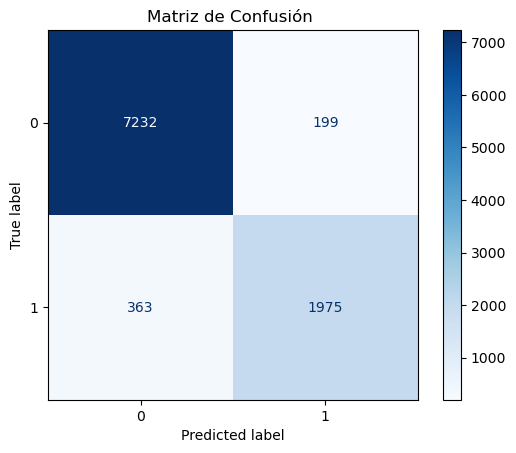

In [ ]:
svm_rbf_model = train_and_evaluate_svm('linear')

Kernel: rbf
Train Accuracy : 0.94664
Test Accuracy : 0.94349
Precisión del modelo: 0.9434947282219265
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7431
           1       0.93      0.83      0.88      2338

    accuracy                           0.94      9769
   macro avg       0.94      0.90      0.92      9769
weighted avg       0.94      0.94      0.94      9769

Matriz de confusión:
 [[7282  149]
 [ 403 1935]]


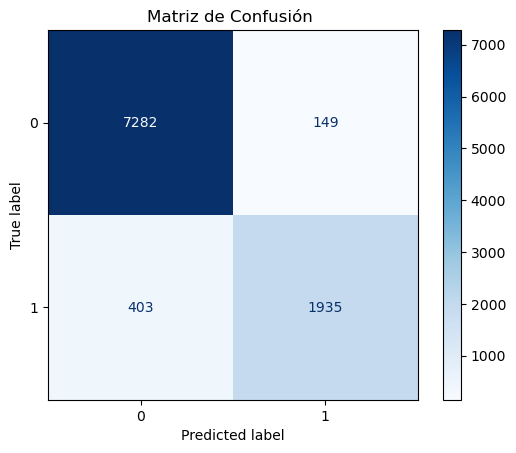

In [ ]:
svm_rbf_model = train_and_evaluate_svm('rbf')

Kernel: poly
Train Accuracy : 0.94641
Test Accuracy : 0.94237
Precisión del modelo: 0.9423687173712765
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7431
           1       0.93      0.82      0.87      2338

    accuracy                           0.94      9769
   macro avg       0.94      0.90      0.92      9769
weighted avg       0.94      0.94      0.94      9769

Matriz de confusión:
 [[7293  138]
 [ 425 1913]]


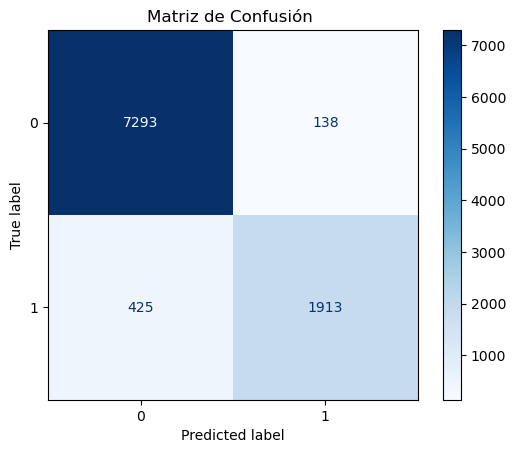

In [ ]:
svm_rbf_model = train_and_evaluate_svm('poly')

Kernel: sigmoid
Train Accuracy : 0.85983
Test Accuracy : 0.86232
Precisión del modelo: 0.8623195823523391
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7431
           1       0.71      0.71      0.71      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.81      0.81      9769
weighted avg       0.86      0.86      0.86      9769

Matriz de confusión:
 [[6765  666]
 [ 679 1659]]


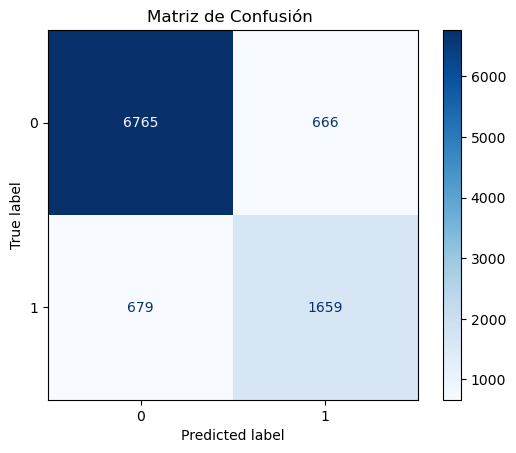

In [ ]:
svm_rbf_model = train_and_evaluate_svm('sigmoid')

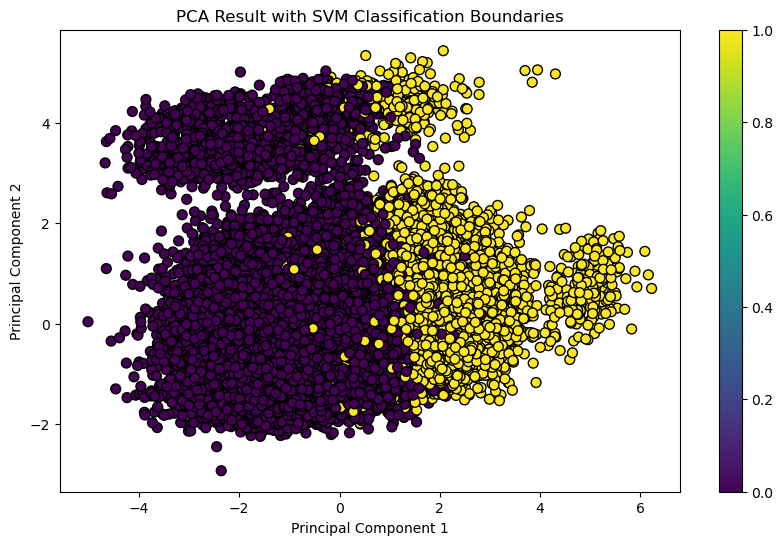

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Result with SVM Classification Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [ ]:
#cargar el modelo 
pkl_filename="pickle_model.plk"
with open(pkl_filename, 'wb')as file:
    pickle.dump(svm_model,file)